In [36]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sbn

In [37]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder

In [38]:
import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
%matplotlib inline

In [39]:
data_training=pd.read_csv('fraudTest.csv')
data_testing=pd.read_csv('fraudTrain.csv')

In [40]:
# Basic information of the training dataset
print("Shape of dataframe : ")
print(data_training.shape)
print() 

print("Data types of each column in the dataframe: ")
print(data_training.dtypes)
print()

print("Invoking the info() method on the dataframe:")
print(data_training.info())
print()

print("Invoking the describe() method on the dataframe:")
print(data_training.describe())
print()

Shape of dataframe : 
(555719, 23)

Data types of each column in the dataframe: 
Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

Invoking the info() method on the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23

In [41]:
data_training.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [42]:
# Basic information of the test dataset
print("Shape of dataframe : ")
print(data_testing.shape)
print() 

print("Data types of each column in the dataframe: ")
print(data_testing.dtypes)
print()

Shape of dataframe : 
(1296675, 23)

Data types of each column in the dataframe: 
Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object



In [43]:
print("Invoking the info() method on the dataframe:")
print(data_testing.info())
print()

print("Invoking the describe() method on the dataframe:")
print(data_testing.describe())
print()

Invoking the info() method on the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296

In [44]:
data_training.drop(columns=['Unnamed: 0','first', 'last', 'street', 'city','trans_date_trans_time','trans_num','dob','amt'],inplace=True)
data_testing.drop(columns=['Unnamed: 0','first', 'last', 'street', 'city','trans_date_trans_time','trans_num','dob','amt'],inplace=True)
data_training.head()

,cc_num,merchant,category,gender,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,2291163933867244,fraud_Kirlin and Sons,personal_care,M,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1371816865,33.986391,-81.200714,0
1,3573030041201292,fraud_Sporer-Keebler,personal_care,F,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1371816873,39.450498,-109.960431,0
2,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,F,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1371816893,40.495810,-74.196111,0
3,3591919803438423,fraud_Haley Group,misc_pos,M,FL,32780,28.5697,-80.8191,54767,Set designer,1371816915,28.812398,-80.883061,0
4,3526826139003047,fraud_Johnston-Casper,travel,M,MI,49632,44.2529,-85.0170,1126,Furniture designer,1371816917,44.959148,-85.884734,0


In [45]:
enc = LabelEncoder()
data_training["merchant"] = enc.fit_transform(data_training["merchant"])
data_training["category"] = enc.fit_transform(data_training["category"])
data_training["gender"] = enc.fit_transform(data_training["gender"])
data_training["job"] = enc.fit_transform(data_training["job"])
data_training["state"] = enc.fit_transform(data_training["state"])
data_testing["merchant"] = enc.fit_transform(data_testing["merchant"])
data_testing["category"] = enc.fit_transform(data_testing["category"])
data_testing["gender"] = enc.fit_transform(data_testing["gender"])
data_testing["job"] = enc.fit_transform(data_testing["job"])
data_testing["state"] = enc.fit_transform(data_testing["state"])

In [46]:
X = data_training.drop(['is_fraud'], axis=1)
y = data_training['is_fraud']
X1 = data_testing.drop(['is_fraud'], axis=1)
y1 = data_testing['is_fraud']

In [47]:
clf = GridSearchCV(LogisticRegression(solver='liblinear', multi_class='auto'), {
    'C': [1,10,20],
}, cv=5, return_train_score=False)
clf.fit(X, y)
clf.cv_results_
data_training1 = pd.DataFrame(clf.cv_results_)
data_training1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.677507,0.102792,0.023962,0.015949,1,{'C': 1},0.99614,0.99614,0.99614,0.99614,0.99614,0.99614,1.389150e-08,1
1,0.628826,0.073040,0.014210,0.001012,10,{'C': 10},0.99614,0.99614,0.99614,0.99614,0.99614,0.99614,1.389150e-08,1
2,0.571744,0.051695,0.013872,0.001729,20,{'C': 20},0.99614,0.99614,0.99614,0.99614,0.99614,0.99614,1.389150e-08,1


In [48]:
from sklearn.metrics import accuracy_score
Model1=LogisticRegression(solver='liblinear', multi_class='auto',C=10)
Model1.fit(X, y)
y_pred = Model1.predict(X1)
accuracy = accuracy_score(y1, y_pred)
print("Accuracy:", accuracy)
score=[]
score.append(accuracy)
score

Accuracy: 0.9942113482561166


[0.9942113482561166]

In [49]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Shape of X:", X1.shape)
print("Shape of y:", y1.shape)

Shape of X: (555719, 13)
Shape of y: (555719,)
Shape of X: (1296675, 13)
Shape of y: (1296675,)


In [50]:
rs = RandomForestClassifier()
rs.fit(X,y)
y_pred = rs.predict(X1)
accuracy = accuracy_score(y1, y_pred)
print("Accuracy:", accuracy)
score.append(accuracy)
score

Accuracy: 0.9937278038058881


[0.9942113482561166, 0.9937278038058881]

In [52]:
clf = GridSearchCV(tree.DecisionTreeClassifier(random_state=0), {
            'criterion': ['gini', 'entropy']
,
}, cv=10, return_train_score=False)
clf.fit(X, y)
clf.cv_results_
data_training3 = pd.DataFrame(clf.cv_results_)
data_training3

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,8.847860,0.287294,0.017390,0.012063,gini,{'criterion': 'gini'},0.004661,0.992964,0.967142,0.922821,0.749046,0.157813,0.034100,0.037753,0.088282,0.996059,0.495064,0.437100,2
1,7.798999,0.302904,0.013726,0.001293,entropy,{'criterion': 'entropy'},0.923631,0.993900,0.988879,0.908209,0.682340,0.612917,0.723602,0.664831,0.026758,0.996149,0.752122,0.280477,1


In [53]:
Dtree=tree.DecisionTreeClassifier(random_state=0,criterion='entropy',splitter="best")
Dtree.fit(X, y)
y_pred = Dtree.predict(X1)
accuracy = accuracy_score(y1, y_pred)
print("Accuracy:", accuracy)
score.append(accuracy)

Accuracy: 0.9860504752540151


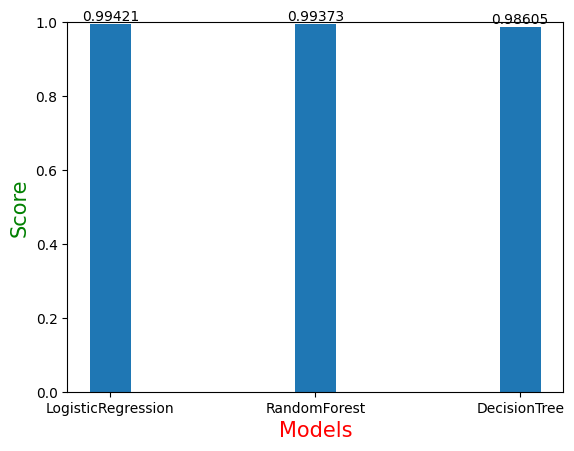

<Figure size 1500x1000 with 0 Axes>

In [54]:
import matplotlib.pyplot as plt
import numpy as np

Models = ['LogisticRegression', 'RandomForest', 'DecisionTree']
y = score

fig, ax = plt.subplots()

x = np.arange(len(Models))

ax.bar(x, y, width=0.2)
ax.set_xticks(x)
ax.set_xticklabels(Models)
ax.set_xlabel('Models', fontsize=15, color='red')
ax.set_ylabel('Score', fontsize=15, color='green')
ax.set_ylim(0, 1.0)  # Adjust the y-axis limit based on your data range

for index, value in enumerate(y):
    plt.text(x=index, y=value+0.01 , s=str(round(value, 5)), ha='center')


plt.figure(figsize=(15,10))
plt.tight_layout()
plt.show()